In [5]:
# Kullanacağımız Kütüphanaeleri Ekledim.
# Yüklediğim kütüphaneler veri analizleri ve manipülasyonu ( pandas) ,
# sayısal hesaplamalar, görüntü işlemeler için kullanılan yaygın kütüphanelerdir.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

sns.set()

In [6]:
# Dosya çok büyük olduğu için clone dan ilgili veriyi çekiyorum.
# Bu kod, bir git deposunun (repository) bilgisayarınıza klonlanmasını ve ardından
# Kendi colab datalarda kullanılmasını sağlar.

!git clone https://github.com/hardik0/AI-for-Medicine-Specialization
%cd AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/

Cloning into 'AI-for-Medicine-Specialization'...
remote: Enumerating objects: 1601, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 1601 (delta 9), reused 2 (delta 0), pack-reused 1573 (from 1)
Receiving objects: 100% (1601/1601), 720.36 MiB | 21.87 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (1497/1497), done.
/content/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis


In [7]:
%ls nih/

# Bu komut, belirtilen dizindeki dosya ve klasörleri listelemek için kullanılır.

densenet.hdf5  images_small/  pretrained_model.h5  test.csv  train-small.csv  valid-small.csv


In [8]:
# CSV dosyasıdan veri cekiliyor. 1000 kayıt ve 16 kolondan oluşan bir veri setimiz var.
# Bu kısımda  CSV dosyasını okuyoruz  ve onu bir DataFrame nesnesine dönüştürmeye çalışıyoruz.

train_df = pd.read_csv("nih/train-small.csv")

# Print first 5 rows
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')

#İlk 10 veri satırını ekrana getiriyorum.
train_df.head(10)


There are 1000 rows and 16 columns in this data frame


Image  Atelectasis  Cardiomegaly  Consolidation  Edema  \
0  00008270_015.png            0             0              0      0   
1  00029855_001.png            1             0              0      0   
2  00001297_000.png            0             0              0      0   
3  00012359_002.png            0             0              0      0   
4  00017951_001.png            0             0              0      0   
5  00001232_002.png            1             1              0      0   
6  00017135_000.png            0             0              0      0   
7  00027235_000.png            0             0              0      0   
8  00014197_007.png            0             0              0      0   
9  00011584_002.png            0             0              0      0   

   Effusion  Emphysema  Fibrosis  Hernia  Infiltration  Mass  Nodule  \
0         0          0         0       0             0     0       0   
1         1          0         0       0             1     0       0   
2         0          0         0       0             0     0       0   
3         0          0         0       0             0     0       0   
4         0          0         0       0             1     0       0   
5         1          0         0       0             1     0       0   
6         0          0         0       0             0     0       0   
7         0          0         0       0             0     0       0   
8         0          0         0       0             0     0       0   
9         0          0         0       0             0     0       0   

   PatientId  Pleural_Thickening  Pneumonia  Pneumothorax  
0       8270                   0          0             0  
1      29855                   0          0             0  
2       1297                   1          0             0  
3      12359                   0          0             0  
4      17951                   0          0             0  
5       1232                   0          0             0  
6      17135                   0          0             0  
7      27235                   0          0             0  
8      14197                   0          0             0  
9      11584                   0          0             0

In [9]:
# Info değeri ile DataFrame'deki toplam satır sayısını buluyorum.
# train_df komutu DataFrame hakkında şu bilgileri sağlar.
# Veri tipi ,Veri sayısı, Toplam satır Sayısı, Bellek Kullanımı

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

In [10]:
# Toplam kayıt sayımız 1000 ve bunun 928 tanesi benzer değil. Yani 72 tane kayıt tekarlı diyebiliriz.

print(f"The total patient ids are {train_df['PatientId'].count()}, from those the unique ids are {train_df['PatientId'].value_counts().shape[0]} ")

The total patient ids are 1000, from those the unique ids are 928 


In [11]:
# Mükerrer PatientId'leri bulma kod rutinim. Buradan 72 kaydın tekrarlı oldugunu gorebiliyoruz.
duplicate_patients = train_df[train_df.duplicated(subset=['PatientId'])]

# Mükerrer PatientId'ler
print("\nMükerrer 'PatientId' Kayıtları:")
print(duplicate_patients)


Mükerrer 'PatientId' Kayıtları:
                Image  Atelectasis  Cardiomegaly  Consolidation  Edema  \
27   00012045_053.png            0             0              0      0   
207  00013111_098.png            0             0              0      0   
249  00006039_009.png            1             0              0      0   
258  00026505_000.png            0             0              0      0   
296  00020213_091.png            1             0              1      0   
..                ...          ...           ...            ...    ...   
964  00013003_038.png            1             0              0      0   
968  00003028_002.png            0             0              0      0   
985  00020213_003.png            0             0              1      0   
994  00027235_001.png            0             0              0      0   
996  00020113_005.png            0             0              0      0   

     Effusion  Emphysema  Fibrosis  Hernia  Infiltration  Mass  Nodule  \
27  

In [12]:
# Ilgili Mukerrer kayıtlari sildirip satır sayımı 928 e dusuruyorum

train_df = train_df.drop_duplicates(subset=['PatientId'])

print(train_df)

                Image  Atelectasis  Cardiomegaly  Consolidation  Edema  \
0    00008270_015.png            0             0              0      0   
1    00029855_001.png            1             0              0      0   
2    00001297_000.png            0             0              0      0   
3    00012359_002.png            0             0              0      0   
4    00017951_001.png            0             0              0      0   
..                ...          ...           ...            ...    ...   
993  00019605_001.png            0             0              0      0   
995  00015869_010.png            0             0              0      0   
997  00019939_000.png            0             0              0      0   
998  00030496_000.png            0             0              0      0   
999  00012363_002.png            0             0              0      0   

     Effusion  Emphysema  Fibrosis  Hernia  Infiltration  Mass  Nodule  \
0           0          0         0   

In [13]:
print(f"The total patient ids are {train_df['PatientId'].count()}, from those the unique ids are {train_df['PatientId'].value_counts().shape[0]} ")

The total patient ids are 928, from those the unique ids are 928 


In [14]:
# İlgili kolonlar yazdırırılıyor ve sonrasında gereksiz olan 2 kolon bigisi siliniyor.

columns = train_df.keys()
columns = list(columns)
print(columns)

columns.remove('Image')
columns.remove('PatientId')
# Get the total classes
print(f"There are {len(columns)} columns of labels for these conditions: {columns}")

['Image', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'PatientId', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']
There are 14 columns of labels for these conditions: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [15]:
# Ornek sayıları bulunuyor.
# sütundaki tüm değerlerin toplamını alıyorum ve  her sütun ve toplam değeri hakkında bir çıktı veriyorum.

for column in columns:
    print(f"The class {column} has {train_df[column].sum()} samples")

The class Atelectasis has 94 samples
The class Cardiomegaly has 19 samples
The class Consolidation has 27 samples
The class Edema has 16 samples
The class Effusion has 107 samples
The class Emphysema has 12 samples
The class Fibrosis has 14 samples
The class Hernia has 2 samples
The class Infiltration has 159 samples
The class Mass has 41 samples
The class Nodule has 51 samples
The class Pleural_Thickening has 18 samples
The class Pneumonia has 9 samples
The class Pneumothorax has 33 samples


Display Random Images


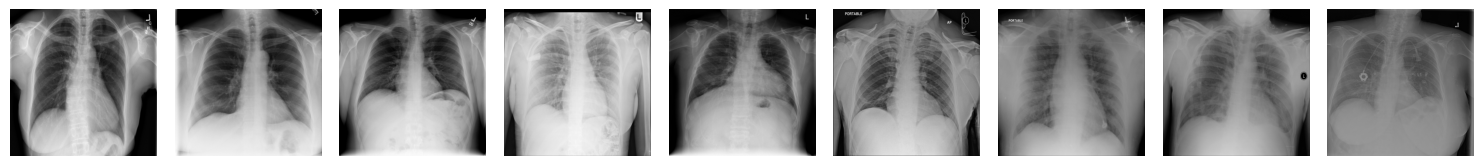

In [25]:
# İlgili dosyadan resimleri cekiyorum
# Bu ifade, pandas DataFrame olan train_df içindeki 'Image' adlı sütunu seçer.
# 'Image' sütunu, genellikle bir veri kümesindeki görüntü dosyalarının yollarını veya görüntü verilerini içerebilir.


images = train_df['Image'].values

# Rastgele 9 tane goruntuyu , tekrar etmeyecek sekilde yazdırıyorum. ( Replace =False ile)
random_images = [np.random.choice(images, replace=False) for i in range(9)]

# Resimlerin lokasyonunu belirtiyorum.
img_dir = 'nih/images_small/'

# Resimlerin lokasyonunu belirtiyorum.
print('Display Random Images')

# Image in boyutlarını belirliyoruz.
plt.figure(figsize=(15,10))

# Yanyana 9 adet image rastgele getiriyoruz.
for i in range(9):
    plt.subplot(1, 9, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

Image 1: 00024597_000.png
The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.6016 and the standard deviation is 0.2605
--------------------------------------------------


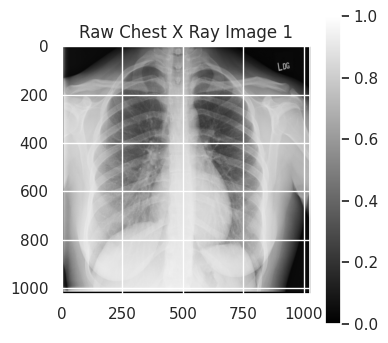

Image 2: 00016092_003.png
The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.4391 and the standard deviation is 0.1466
--------------------------------------------------


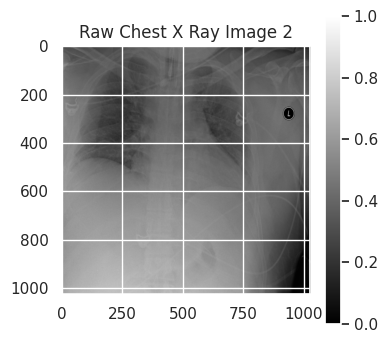

Image 3: 00009549_001.png
The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 0.9961 and the minimum is 0.0000
The mean value of the pixels is 0.4162 and the standard deviation is 0.2971
--------------------------------------------------


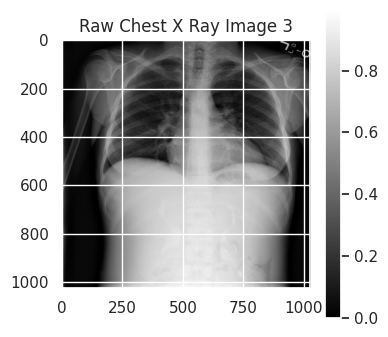

Image 4: 00000248_021.png
The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.4725 and the standard deviation is 0.2004
--------------------------------------------------


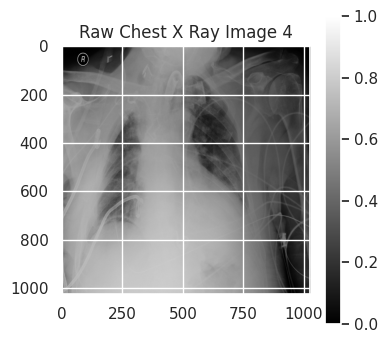

Image 5: 00000798_010.png
The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.4902 and the standard deviation is 0.1601
--------------------------------------------------


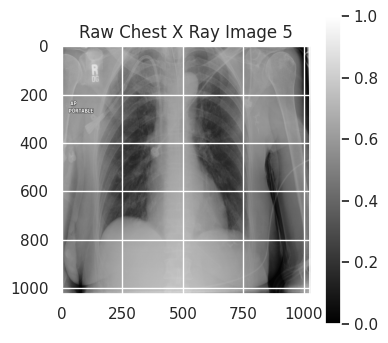

Image 6: 00016784_000.png
The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 0.9529 and the minimum is 0.0000
The mean value of the pixels is 0.4723 and the standard deviation is 0.2412
--------------------------------------------------


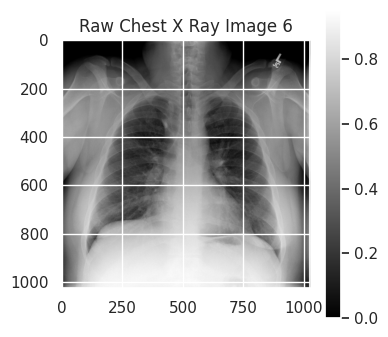

Image 7: 00023065_003.png
The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.3500 and the standard deviation is 0.1991
--------------------------------------------------


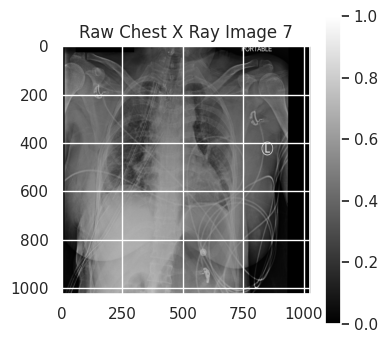

Image 8: 00025252_030.png
The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.4294 and the standard deviation is 0.1809
--------------------------------------------------


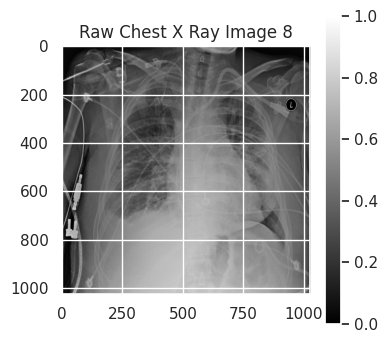

Image 9: 00017178_007.png
The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.6256 and the standard deviation is 0.1769
--------------------------------------------------


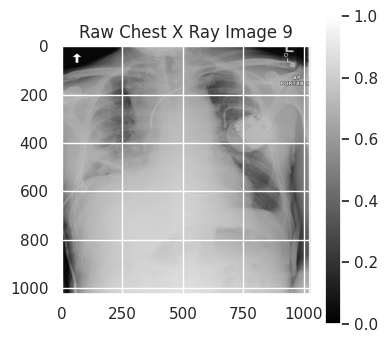

In [18]:
# Rastgele yukarida aldigim 9 resmin istatiksel ozelliklerini buluyorum.
# Bu kod bloğu bir görüntüyü görselleştirmek için matplotlib kütüphanesinin fonksiyonlarını kullanır.
# Kod, görselleştirilen görüntüyü bir grafik üzerinde gri tonlamada (grayscale) ve üzerine renk skalası ekleyerek,
# başlık ekler ve figür boyutunu ayarlamasını sağlar.

# Rastgele seçilen görüntülerde, görüntü kalitesi iyi olarak gözüküyor.

for i in range(9):
    sample_img = random_images[i]

    # Resmi yükle
    raw_image = plt.imread(os.path.join(img_dir, sample_img))

    # Resmi görselleştir
    # Burada, figür boyutu 10x10 inç olarak belirlenmiştir. Bu, görüntüyü daha büyük bir
    # pencerede gösterir ve detayların daha rahat görülmesini sağlar.

    # Minimum Piksel Değeri ,Görüntüdeki en düşük piksel değeri 0'dır.
    # Bu, piksellerin tam siyah olduğu veya çok karanlık bir bölgeyi temsil eder.
    # 0, tamamen karanlık bir bölgeyi ifade eder.

    # Maksimum Piksel Değeri: Görüntüdeki en yüksek piksel değeri 1 olarak belirtilmiş.
    # Bu, piksellerin [0, 1] aralığında normalleştirildiğini gösterir. Yani, her pikselin değeri 0 (tam siyah) ile 1 (tam beyaz) arasında bir değer alır.
    # Maksimum değer olan 1, görüntüdeki en yoğun ışık alanını (beyaz veya çok parlak bölge) temsil eder.

    # Ortalama Piksel Değeri 0.5'e yakın olması, görselin büyük ölçüde orta gri tonlarında olduğunu, ne çok parlak ne de çok karanlık olduğunu ifade eder.

    plt.figure(figsize=(4, 4))  # Her bir resim için figür boyutunu ayarlıyoruz
    plt.imshow(raw_image, cmap='gray')  # Gri tonlamada göster
    plt.colorbar()  # Renk skalasını ekle
    plt.title(f'Raw Chest X Ray Image {i+1}')

    # Resimle ilgili metrikler
    print(f"Image {i+1}: {sample_img}")
    print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
    print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
    print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")
    print('-' * 50)  # Ayırıcı çizgi

    # Görselleri göster
    plt.show()

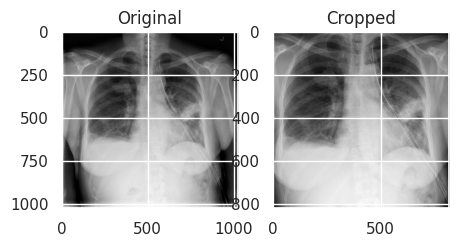

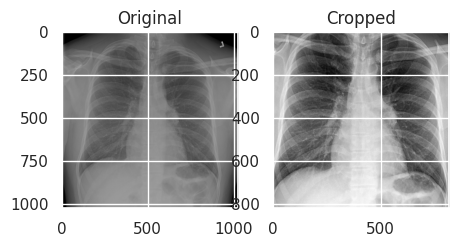

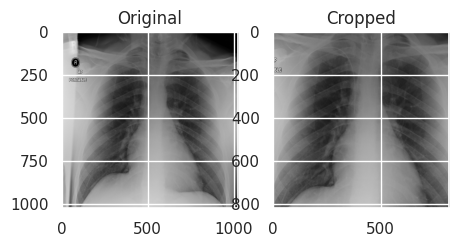

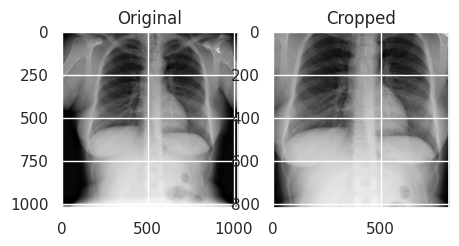

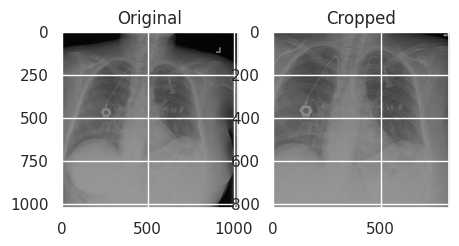

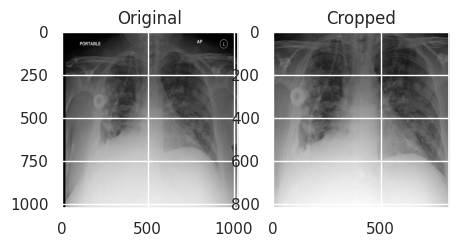

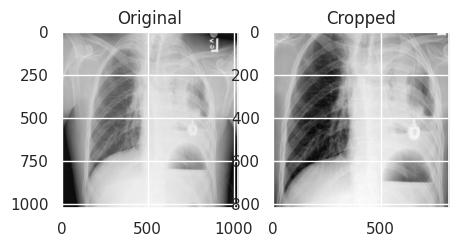

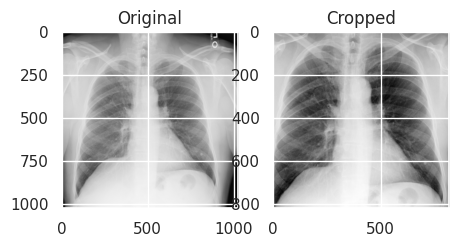

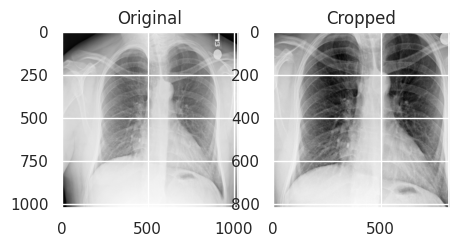

In [19]:
#Görüntüleri Akciğer bölgeleri kaybolmayacak şekilde kenarlardan kırptım (Crop),ilgi alanı dışındaki gürültü bölgelerinden kurtuldum.

import cv2
import matplotlib.pyplot as plt
import os

def crop_images(image_dir, output_dir, num_images=9):
    """Crops images to remove border noise while preserving lung regions.

    Args:
        image_dir: Directory containing the images.
        output_dir: Directory to save cropped images.
        num_images: Number of images to process (default is 9).
    """

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Get the list of image filenames from the directory
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Process only the first 'num_images' files
    for i, filename in enumerate(image_files[:num_images]):
        img_path = os.path.join(image_dir, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale

        if img is not None:
            # Basic cropping example (adjust as needed based on your images)
            # This example crops 10% from each border. Adjust as needed.
            height, width = img.shape[:2]
            crop_height = int(height * 0.1)
            crop_width = int(width * 0.1)
            cropped_img = img[crop_height:height - crop_height, crop_width:width - crop_width]

            # Save the cropped image to the output directory
            output_path = os.path.join(output_dir, filename)
            cv2.imwrite(output_path, cropped_img)

            # Optional: Display the original and cropped images for verification
            plt.figure(figsize=(5, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(img, cmap='gray')
            plt.title('Original')
            plt.subplot(1, 2, 2)
            plt.imshow(cropped_img, cmap='gray')
            plt.title('Cropped')
            plt.show()
        else:
            print(f"Could not read image: {img_path}")

# Örnek kullanım:
# crop_images('input_images_directory', 'output_images_directory')

# Example usage:
image_directory = 'nih/images_small'  # Replace with your image directory
output_directory = 'cropped_images'  # Replace with the output directory
crop_images(image_directory, output_directory)

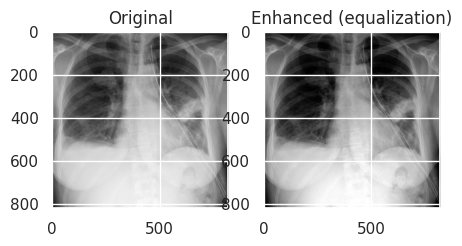

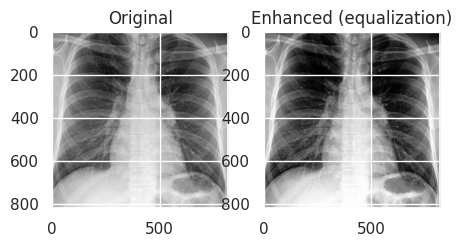

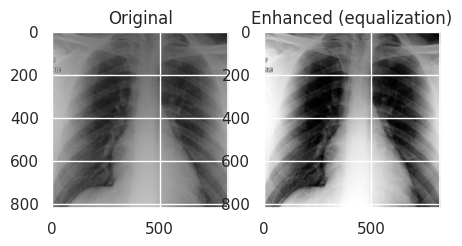

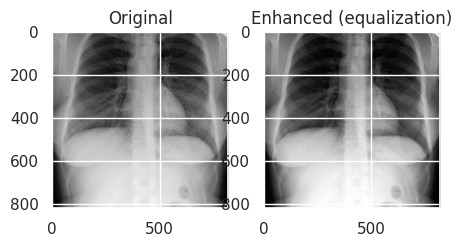

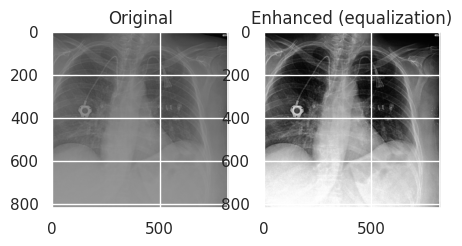

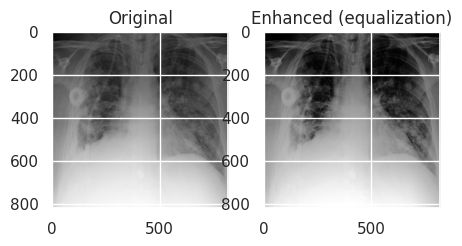

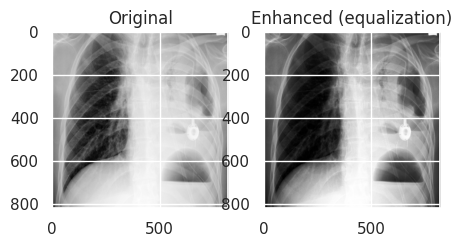

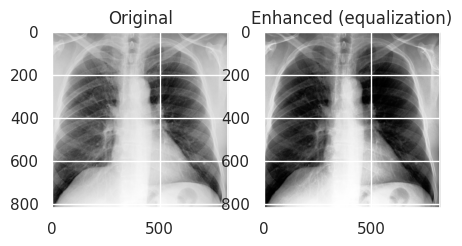

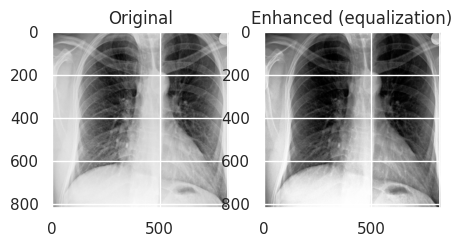

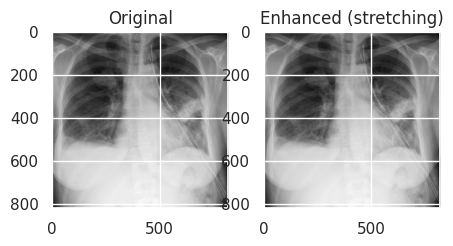

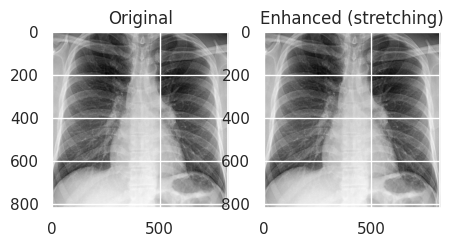

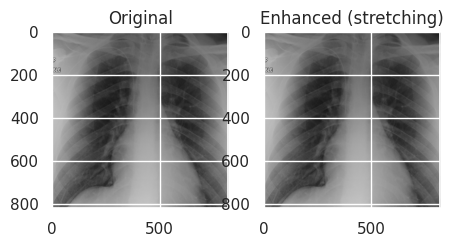

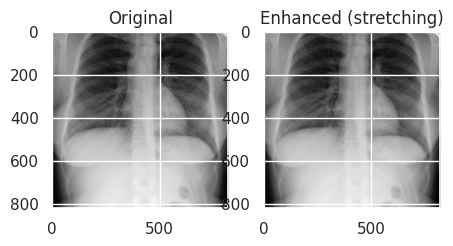

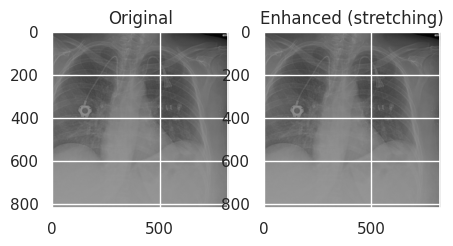

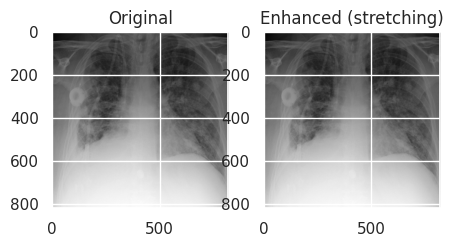

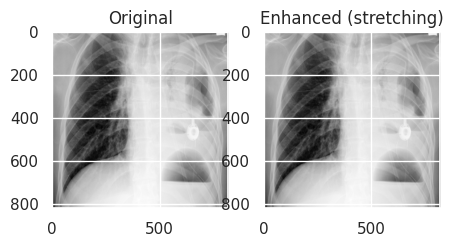

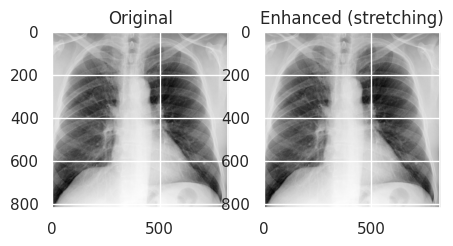

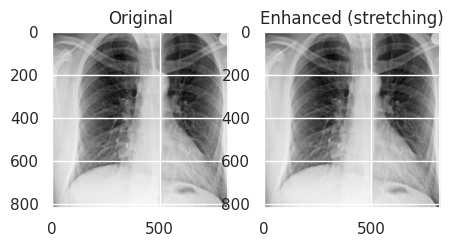

In [20]:
# Kontrast Germe (Stretching) Histogram Eşitleme (Equalization) yöntemi uyguladım.

def enhance_images(image_dir, output_dir, method='equalization', num_images=9):
    """Enhances images using histogram equalization or contrast stretching.

    Args:
        image_dir: Directory containing the images.
        output_dir: Directory to save enhanced images.
        method: Enhancement method ('equalization' or 'stretching').
        num_images: Number of images to process.
    """

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

    for i, filename in enumerate(image_files[:num_images]):
        img_path = os.path.join(image_dir, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is not None:
            if method == 'equalization':
                enhanced_img = cv2.equalizeHist(img)
            elif method == 'stretching':
                # Contrast stretching
                min_val = img.min()
                max_val = img.max()
                enhanced_img = ((img - min_val) / (max_val - min_val)) * 255
                enhanced_img = enhanced_img.astype('uint8')
            else:
                print(f"Invalid method: {method}")
                continue

            output_path = os.path.join(output_dir, filename)
            cv2.imwrite(output_path, enhanced_img)

            plt.figure(figsize=(5, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(img, cmap='gray')
            plt.title('Original')
            plt.subplot(1, 2, 2)
            plt.imshow(enhanced_img, cmap='gray')
            plt.title(f'Enhanced ({method})')
            plt.show()
        else:
            print(f"Could not read image: {img_path}")


# Example usage (Histogram Equalization):
image_directory = 'cropped_images'  # Use the directory where cropped images are saved
output_directory = 'enhanced_images_equalization'
enhance_images(image_directory, output_directory, method='equalization')

# Example usage (Contrast Stretching):
output_directory_stretch = 'enhanced_images_stretch'
enhance_images(image_directory, output_directory_stretch, method='stretching')

In [22]:
# Median ve Gaussian Blur uygulanıp görselleştirme işlemi yapıldı.
# "Median" ve "Gaussian Blur" (Gaussian Bulanıklık) gibi teknikler, görüntü işleme alanında sıkça kullanılan filtrelerdir.
# Medyan bulanıklık, bir görüntüdeki her pikselin değerini, çevresindeki piksellerin medyan (orta) değeri ile değiştiren bir filtreleme yöntemidir.
# Bu işlem, özellikle "gürültü" (noise) ve "salt-and-pepper" türü hataları azaltmak için kullanılır.
# Gaussian blur, her pikselin değerini, çevresindeki piksellerin ağırlıklı ortalaması ile değiştirir. Bu ağırlıklı ortalama, her pikselin ne kadar "yakın" olduğuna göre belirlenir
# ve bu mesafe, bir Gaussian fonksiyonu ile hesaplanır. Yani, yakın piksellere daha yüksek ağırlık verilir.

def apply_median_gaussian_blur(image_path, output_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not read image at {image_path}")
        return

    # Apply Median Blur
    median_blurred = cv2.medianBlur(img, 5)  # Kernel size 5

    # Apply Gaussian Blur
    gaussian_blurred = cv2.GaussianBlur(img, (5, 5), 0)  # Kernel size 5x5, sigma=0

    # Display the original and blurred images
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(median_blurred, cmap='gray')
    plt.title('Median Blurred Image')

    plt.subplot(1, 3, 3)
    plt.imshow(gaussian_blurred, cmap='gray')
    plt.title('Gaussian Blurred Image')

    plt.show()

    # Save the blurred images (optional)
    cv2.imwrite(output_path.replace('.png','_median.png'), median_blurred)
    cv2.imwrite(output_path.replace('.png','_gaussian.png'), gaussian_blurred)


# Example usage (assuming you have 'enhanced_images_equalization' directory):
image_dir = 'enhanced_images_equalization'
for filename in os.listdir(image_dir):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(image_dir, filename)
        output_path = os.path.join(image_dir, filename)  # Save in the same directory
        apply_median_gaussian_blur(image_path, output_path)

Output hidden; open in https://colab.research.google.com to view.

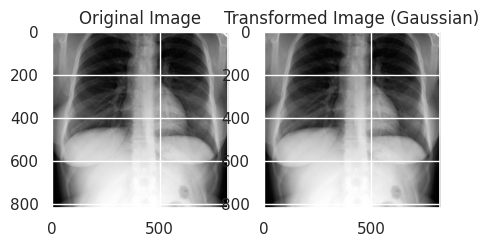

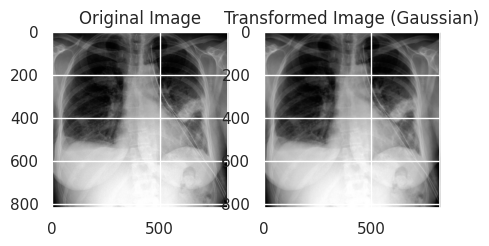

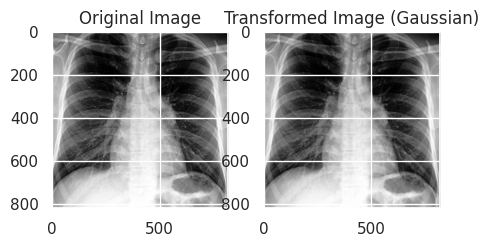

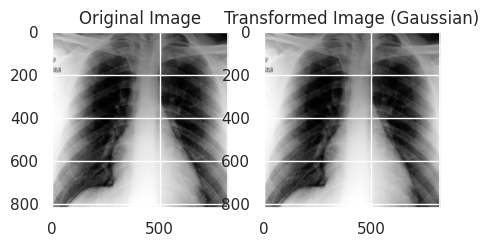

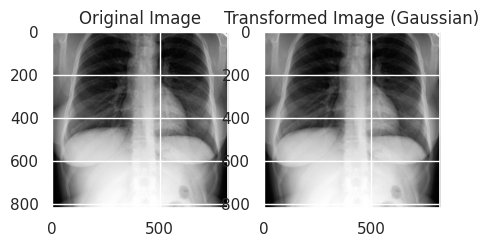

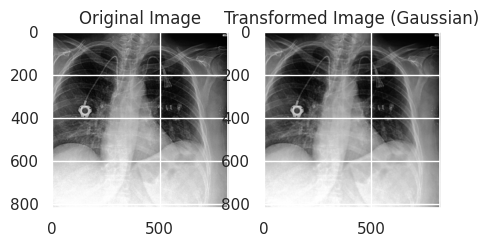

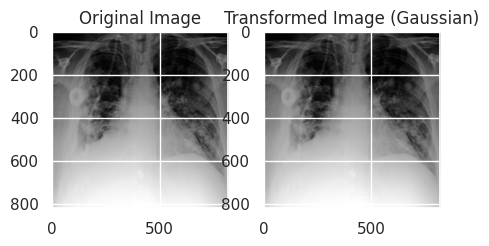

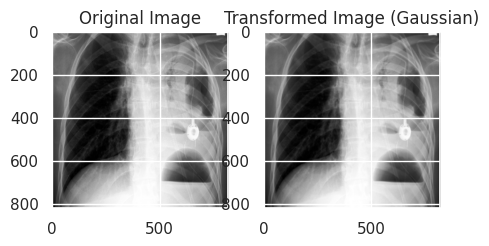

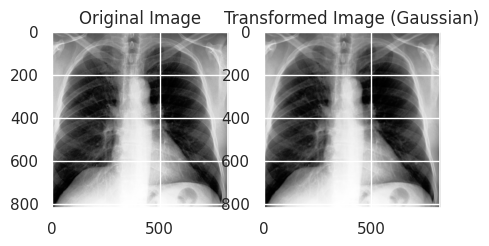

In [26]:
#  Görüntülere Gauss yoğunluk dönüşümü gibi akciğer yoğunluk değerleri ile düşük ve yüksek değerleri ayıracak bir transform uygulandı.

def apply_gaussian_transformation(image_dir, output_dir):
    """Applies Gaussian transformation to enhance lung density values in images.

    Args:
        image_dir: Directory containing the images.
        output_dir: Directory to save the transformed images.
    """

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Limit to 9 images
    image_count = 0

    for filename in os.listdir(image_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(image_dir, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            if img is not None:
                # Apply Gaussian blur (adjust kernel size and sigma as needed)
                blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

                # Example: Histogram equalization after Gaussian blur
                enhanced_img = cv2.equalizeHist(blurred_img)

                output_path = os.path.join(output_dir, filename)
                cv2.imwrite(output_path, enhanced_img)

                # Display original and transformed images (optional)
                plt.figure(figsize=(5, 5))
                plt.subplot(1, 2, 1)
                plt.imshow(img, cmap='gray')
                plt.title('Original Image')
                plt.subplot(1, 2, 2)
                plt.imshow(enhanced_img, cmap='gray')
                plt.title('Transformed Image (Gaussian)')
                plt.show()

                image_count += 1
                # Stop after processing 9 images
                if image_count >= 9:
                    break
            else:
                print(f"Error: Could not read image at {img_path}")

# Example usage:
image_directory = 'enhanced_images_equalization'  # Replace with your image directory
output_directory = 'gaussian_transformed_images'
apply_gaussian_transformation(image_directory, output_directory)


In [28]:
# Global Thresholding, Otsu veya skimage all filter kütüphanesini kullanarak  en az 2 thresholding yöntemi  ile eşik değerlerini belirlendi.
# Thresholding uygulandıktan sonra her iki kütüphane sonuçları da birbirine yakın ve benzer çıktı.

from skimage import filters

def apply_thresholding(image_dir, num_images=9):
    image_count = 0  # Sayacı başlatıyoruz

    for filename in os.listdir(image_dir):
        if image_count >= num_images:  # Eğer 9 resim işlendi ise durdur
            break

        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(image_dir, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            if img is not None:
                # Global Thresholding
                ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

                # Otsu's Thresholding
                ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

                # Local Thresholding using a window (e.g., 11x11)
                local_th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

                # Multi-Otsu Thresholding using skimage
                thresholds = filters.threshold_multiotsu(img, classes=3)
                regions = np.digitize(img, bins=thresholds)

                # Display the images
                plt.figure(figsize=(12, 10))

                # Original Image
                plt.subplot(2, 3, 1)
                plt.imshow(img, cmap='gray')
                plt.title('Original Image')

                # Global Thresholding
                plt.subplot(2, 3, 2)
                plt.imshow(th1, cmap='gray')
                plt.title('Global Thresholding')

                # Otsu's Thresholding
                plt.subplot(2, 3, 3)
                plt.imshow(th2, cmap='gray')
                plt.title("Otsu's Thresholding")

                # Local Thresholding
                plt.subplot(2, 3, 4)
                plt.imshow(local_th, cmap='gray')
                plt.title('Local Thresholding')

                # Multi-Otsu Thresholding
                plt.subplot(2, 3, 5)
                plt.imshow(regions, cmap='gray')
                plt.title('Multi-Otsu Thresholding')

                # Histograms
                plt.subplot(2, 3, 6)
                plt.hist(img.ravel(), bins=256, histtype='step', color='black')
                plt.axvline(ret1, color='r', linestyle='dashed', linewidth=1, label='Global Threshold')
                plt.axvline(ret2, color='g', linestyle='dashed', linewidth=1, label="Otsu's Threshold")
                plt.axvline(thresholds[0], color='b', linestyle='dashed', linewidth=1, label='Multi-Otsu Threshold 1')
                plt.axvline(thresholds[1], color='y', linestyle='dashed', linewidth=1, label='Multi-Otsu Threshold 2')
                plt.legend(loc='upper right')
                plt.title('Histogram with Thresholds')

                plt.show()

                # Print threshold values
                print(f"Global Threshold Value: {ret1}")
                print(f"Otsu's Threshold Value: {ret2}")
                print(f"Multi-Otsu Threshold Values: {thresholds}")

                # Artık işlenen resmi sayaca ekleyelim
                image_count += 1

            else:
                print(f"Error: Could not read image at {img_path}")

# Example usage
image_directory = 'gaussian_transformed_images'  # Replace with your image directory
apply_thresholding(image_directory)


# Example usage
image_directory = 'gaussian_transformed_images'  # Replace with your image directory
apply_thresholding(image_directory)



Output hidden; open in https://colab.research.google.com to view.

Burada çıkan sonuçlara göre Otsu daha iyi bir sonuç vermiştir.

Otsu, genellikle görüntü işleme alanında kullanılan bir terimdir ve bir görüntüdeki pikselleri, belirli bir eşik değeri kullanarak iki gruba ayırma işlemine verilen isimdir. Bu yöntem, özellikle siyah-beyaz görüntülerde, arka plan ve ön planı ayırmak amacıyla kullanılır.

Otsu'nun eşikleme yöntemi, görüntüdeki piksellerin yoğunluklarını analiz eder ve en iyi ayırma noktasını (eşik değeri) bulmaya çalışır. Bu eşik değeri, görüntüyü en iyi şekilde iki sınıfa ayıran değerdir; yani, arka planın ve nesnelerin histogramlarının varyanslarını minimize etmeye çalışır. Bu yöntem, özellikle otomatik görüntü işleme ve nesne tanıma sistemlerinde kullanışlıdır.

Görüntüdeki kontrastı artırmak veya nesneleri arka plandan ayırmak için yaygın olarak tercih edilen bir tekniktir.

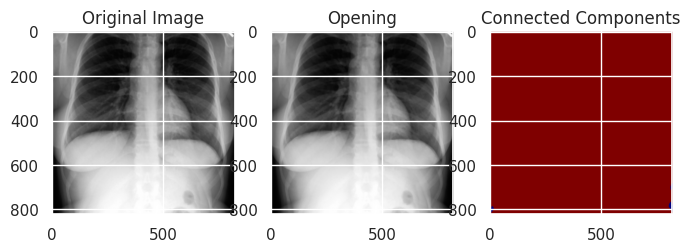

Number of connected components (excluding background): 1


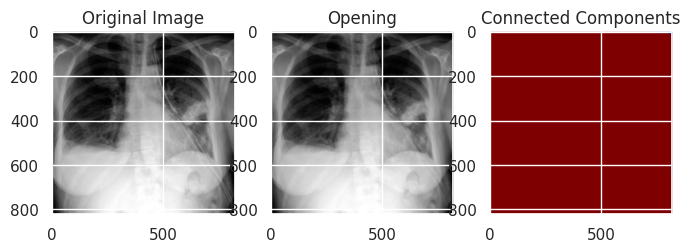

Number of connected components (excluding background): 1


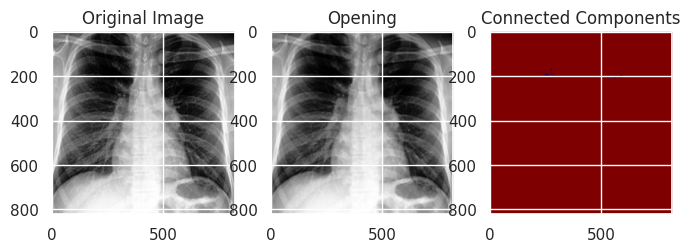

Number of connected components (excluding background): 1


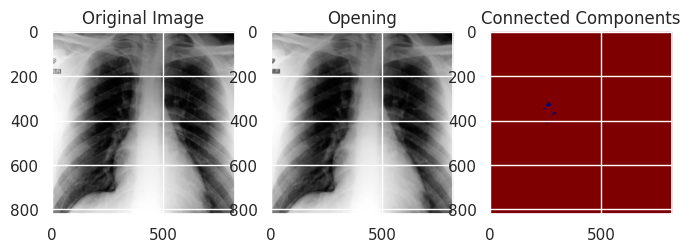

Number of connected components (excluding background): 1


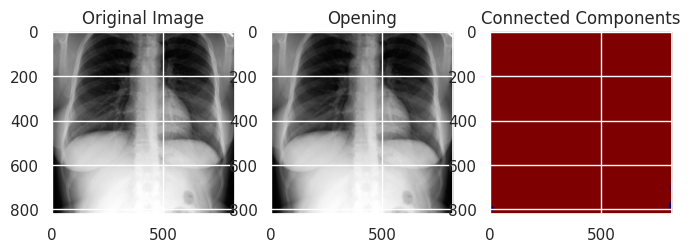

Number of connected components (excluding background): 1


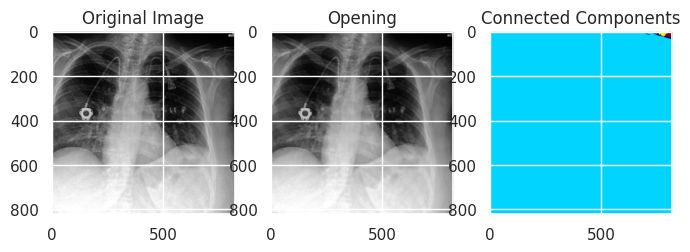

Number of connected components (excluding background): 3


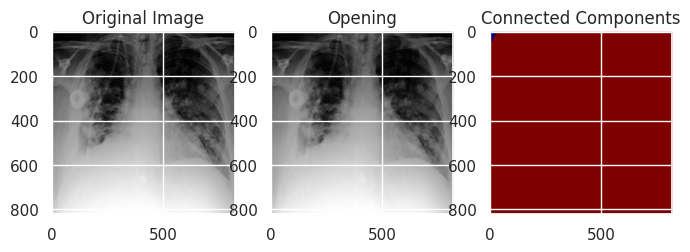

Number of connected components (excluding background): 1


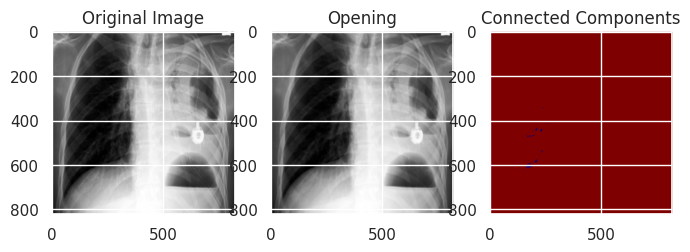

Number of connected components (excluding background): 1


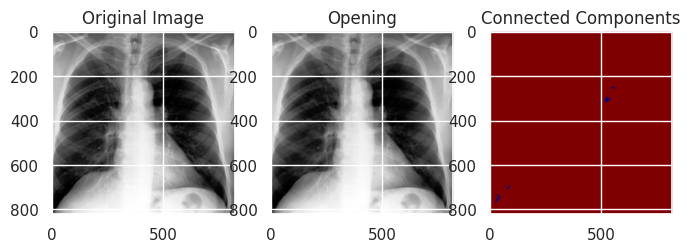

Number of connected components (excluding background): 1


In [29]:
# Uygun morfolojik operatörleri, uygun structural element yapısı ve boyutunu seçerek görüntüye uygulandı
# Giriş ve Çıkış Görüntülerini görseleştirildi.
# Görüntüye bağlantı bileşen analizi (connected component labeling-CCL) (cv2.connectedComponents) uygulayarak olası bölge sayısını print CCL çıktısını plot edildi.

# Görüntüye bağlantı bileşenleri analizi (Connected Component Labeling - CCL) uygulamak, görüntüdeki birbirine bağlı pikselleri gruplandırmak ve her grup için bir etiket (label) atamak anlamına gelir.
# Bu işlem genellikle bölgeleme (segmentation) veya nesne tanıma gibi görevlerde kullanılır. CCL, bir görüntüdeki nesneleri veya ilgilenilen bölgeleri belirlemek için oldukça yaygın bir tekniktir.


def apply_morphological_operations(image_path, output_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not read image at {image_path}")
        return

    # Example: Opening operation (Erosion followed by Dilation)
    kernel = np.ones((5, 5), np.uint8)  # Define the structuring element (adjust size as needed)
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

    # Display the original and processed images
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(opening, cmap='gray')
    plt.title('Opening')

    # Apply connected component analysis
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(opening, connectivity=8)  # connectivity 4 or 8

    # Display the CCL output
    plt.subplot(1, 3, 3)
    plt.imshow(labels, cmap='jet')  # Use a colormap to visualize different components
    plt.title('Connected Components')

    plt.show()

    print(f"Number of connected components (excluding background): {num_labels - 1}")  # excluding background

    # Save the processed image (optional)
    cv2.imwrite(output_path, opening)
    cv2.imwrite(output_path.replace('.png', '_ccl.png'), labels)


def process_multiple_images(image_dir, num_images=9):
    image_count = 0  # Counter to keep track of processed images

    for filename in os.listdir(image_dir):
        if image_count >= num_images:  # Stop after processing the specified number of images
            break

        if filename.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(image_dir, filename)
            output_path = os.path.join(image_dir, 'processed_' + filename)  # Save the processed image with a different name
            apply_morphological_operations(image_path, output_path)

            image_count += 1  # Increment the image counter


# Example usage
image_directory = 'gaussian_transformed_images'  # Replace with your image directory
process_multiple_images(image_directory)


In [30]:
# Elde ettiğiniz labellar için, Centroid ve Area bilgilerinin kesinlikle olacağı, ayrıca bölgelerin yoğunluk ve şekilsel özelliklerini belirten en az 5 tane özniteliği print edildi.

# Yoğunluk değeri genellikle 0 ile 1 arasında değişir.
# Yoğunluk, bir nesnenin ne kadar "katı" olduğunu veya tam olarak ne kadar dolu olduğunu gösterir. 1.00 değeri, bölgenin tamamen dolu ve pürüzsüz olduğunu, yani nesnenin yoğunluğunun tamamen 1 olduğunu ifade eder.
# Bizim değerlerde 1 e yakın çıktığı için pürüzsüz bir sonuç elde ettiğimizi göstermektedir.

def analyze_regions(image_path):
    """
    Analyzes regions in an image using connected component analysis and prints features.
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not read image at {image_path}")
        return

    # Apply connected component analysis
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img, connectivity=8)

    # Print information about each region (excluding the background label 0)
    for i in range(1, num_labels):  # Iterate through regions
        x, y, w, h, area = stats[i]  # Get region statistics
        cx, cy = centroids[i]  # Get region centroid

        print(f"Region {i}:")
        print(f"  Centroid: ({cx:.2f}, {cy:.2f})")
        print(f"  Area: {area}")

        # Calculate additional features
        density = area / (w * h)  # Density: ratio of area to bounding box area
        perimeter = cv2.arcLength(cv2.findContours( (labels == i).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0][0],True)
        circularity = (4 * np.pi * area) / (perimeter**2) if perimeter >0 else 0 #Circularity = (4piA)/P^2
        extent = area / (w * h)  # Extent: ratio of region area to bounding box area
        solidity = area / cv2.contourArea(cv2.findContours((labels == i).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0][0])
        eccentricity = 0 # needs to be calculated

        print(f"  Density: {density:.2f}")
        print(f"  Circularity: {circularity:.2f}")
        print(f"  Extent: {extent:.2f}")
        print(f"  Solidity: {solidity:.2f}")
        print(f"  Eccentricity: {eccentricity:.2f}")

        # you can add more features like aspect ratio, convexity etc


# Example usage
image_directory = 'gaussian_transformed_images'
for filename in os.listdir(image_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
      image_path = os.path.join(image_directory, filename)
      analyze_regions(image_path)

Region 1:
  Centroid: (409.22, 408.91)
  Area: 671303
  Density: 1.00
  Circularity: 0.71
  Extent: 1.00
  Solidity: 1.00
  Eccentricity: 0.00
Region 1:
  Centroid: (408.75, 409.92)
  Area: 670964
  Density: 1.00
  Circularity: 0.78
  Extent: 1.00
  Solidity: 1.00
  Eccentricity: 0.00
Region 1:
  Centroid: (409.48, 409.68)
  Area: 671878
  Density: 1.00
  Circularity: 0.79
  Extent: 1.00
  Solidity: 1.00
  Eccentricity: 0.00
Region 1:
  Centroid: (409.43, 409.73)
  Area: 671600
  Density: 1.00
  Circularity: 0.79
  Extent: 1.00
  Solidity: 1.00
  Eccentricity: 0.00
Region 1:
  Centroid: (409.21, 408.90)
  Area: 671279
  Density: 1.00
  Circularity: 0.71
  Extent: 1.00
  Solidity: 1.00
  Eccentricity: 0.00
Region 1:
  Centroid: (408.72, 410.31)
  Area: 671023
  Density: 1.00
  Circularity: 0.76
  Extent: 1.00
  Solidity: 1.00
  Eccentricity: 0.00
Region 2:
  Centroid: (805.24, 15.26)
  Area: 524
  Density: 0.65
  Circularity: 0.61
  Extent: 0.65
  Solidity: 1.11
  Eccentricity: 0.00
Reg

<ipython-input-30-a74a91973b95>:33: RuntimeWarning: divide by zero encountered in divide
  solidity = area / cv2.contourArea(cv2.findContours((labels == i).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0][0])


  Circularity: 0.79
  Extent: 1.00
  Solidity: 1.00
  Eccentricity: 0.00
Region 1:
  Centroid: (409.23, 408.91)
  Area: 671316
  Density: 1.00
  Circularity: 0.71
  Extent: 1.00
  Solidity: 1.00
  Eccentricity: 0.00
Region 1:
  Centroid: (409.47, 409.70)
  Area: 671804
  Density: 1.00
  Circularity: 0.79
  Extent: 1.00
  Solidity: 1.00
  Eccentricity: 0.00
Region 1:
  Centroid: (408.27, 410.80)
  Area: 670198
  Density: 1.00
  Circularity: 0.75
  Extent: 1.00
  Solidity: 1.00
  Eccentricity: 0.00
Region 2:
  Centroid: (776.80, 9.18)
  Area: 712
  Density: 0.66
  Circularity: 0.42
  Extent: 0.66
  Solidity: 1.11
  Eccentricity: 0.00
Region 3:
  Centroid: (805.31, 15.20)
  Area: 521
  Density: 0.67
  Circularity: 0.61
  Extent: 0.67
  Solidity: 1.11
  Eccentricity: 0.00
Region 1:
  Centroid: (409.72, 409.37)
  Area: 671704
  Density: 1.00
  Circularity: 0.79
  Extent: 1.00
  Solidity: 1.00
  Eccentricity: 0.00
Region 1:
  Centroid: (409.45, 409.73)
  Area: 671538
  Density: 1.00
  Circul

Not enough regions found. Applying automatic labeling.


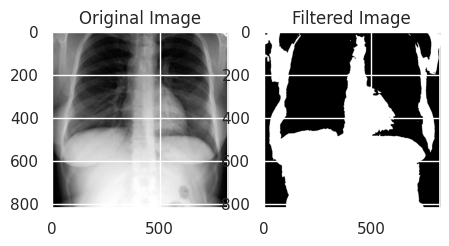

Not enough regions found. Applying automatic labeling.


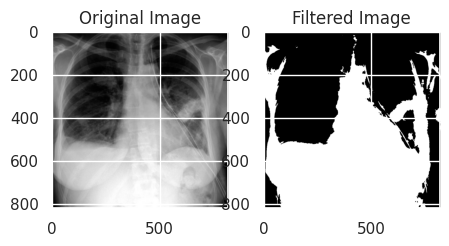

Not enough regions found. Applying automatic labeling.


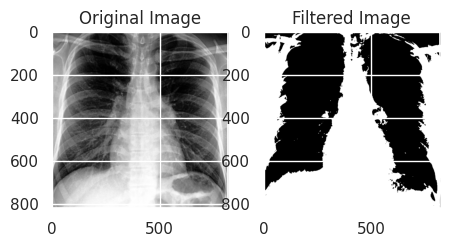

Not enough regions found. Applying automatic labeling.


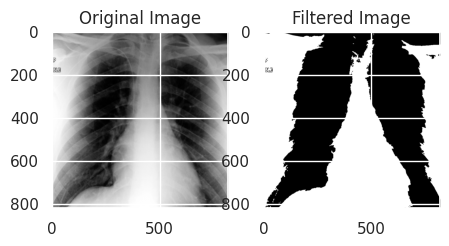

Not enough regions found. Applying automatic labeling.


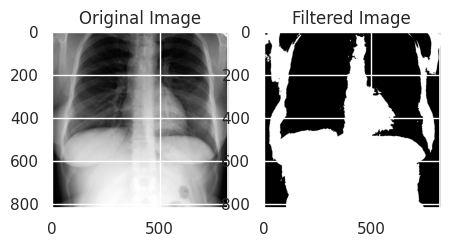

Not enough regions found. Applying automatic labeling.


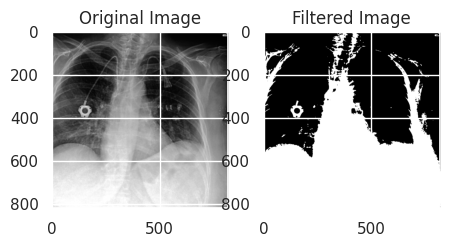

Not enough regions found. Applying automatic labeling.


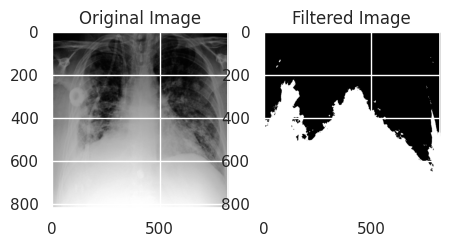

Not enough regions found. Applying automatic labeling.


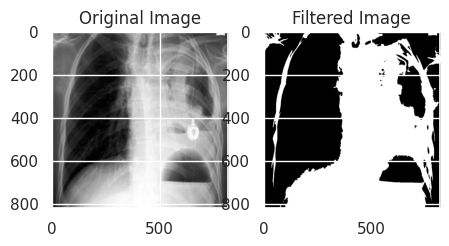

Not enough regions found. Applying automatic labeling.


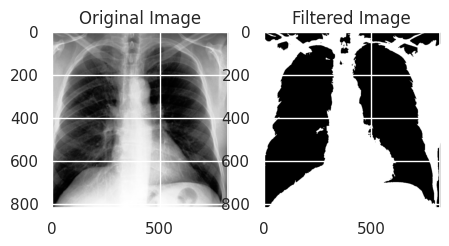

In [31]:
# Elde ettiğiniz stats ve labelsları inceleyerek akciğer alanlarını en iyi ifade eden öznitelikleri yorumladık.
# Belirlediğimiz özniteliklere göre filtreleme yapıldı
# Belirleyici öznitelik bulunamadıysa. Her görüntüde otomatik olarak label belirleyen algoritmayı yazıldı
# Seçtiğimiz labela sahip filtrelenmiş görüntülere uygun morfolojik işlemleri (structural elemant tipi ve boyutu belirleyerek) uygulayın. Giriş ve çıkış görüntülerini görselleştirdik


def filter_regions(image_path, num_regions=9):
    """
    Filters regions based on area and centroid position.
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not read image at {image_path}")
        return None, None

    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img, connectivity=8)

    # Sort regions by area in descending order
    sorted_regions = sorted(range(1, num_labels), key=lambda i: stats[i, cv2.CC_STAT_AREA], reverse=True)

    filtered_labels = np.zeros_like(labels)

    if len(sorted_regions) >= num_regions :
        # Select the top 'num_regions' regions based on area
        for i in range(num_regions):
            region_label = sorted_regions[i]
            x,y,w,h,area = stats[region_label]
            cx, cy = centroids[region_label]
            # Condition for centroid
            if cx > img.shape[1] / 3 and cx < 2 * img.shape[1] / 3 and cy > img.shape[0] / 3 and cy < 2*img.shape[0] / 3:
                filtered_labels[labels == region_label] = 255
            # If condition not met, try the next region
            elif i < num_regions - 1:
                continue
            else:
                # Try next region if not enough
                region_label = sorted_regions[num_regions]
                filtered_labels[labels == region_label] = 255

    else:
        print("Not enough regions found. Applying automatic labeling.")
        filtered_labels = automatic_labeling(img)

    return filtered_labels, labels


def automatic_labeling(image):
    """
    A placeholder for an automatic labeling algorithm. Replace this with a real algorithm!
    """
    # Basic example: Labels everything above a certain threshold as one region
    _, labeled_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return labeled_image


# Example usage
image_directory = 'gaussian_transformed_images'  # Röntgen resimlerinin bulunduğu dizin
output_directory = 'filtered_images'  # Filtrelenmiş görüntülerin kaydedileceği dizin

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# İşlenecek röntgen sayısını sınırlamak için bir sayaç ekleyebiliriz
counter = 0
for filename in os.listdir(image_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')) and counter < 9:
        image_path = os.path.join(image_directory, filename)
        filtered_img, labels = filter_regions(image_path)

        if filtered_img is not None:
            output_path = os.path.join(output_directory, filename)
            cv2.imwrite(output_path, filtered_img)

            # Görselleştirme
            plt.figure(figsize=(5,5))
            plt.subplot(1,2,1)
            plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
            plt.title('Original Image')
            plt.subplot(1,2,2)
            plt.imshow(filtered_img, cmap='gray')
            plt.title('Filtered Image')
            plt.show()

            counter += 1  # Sayacı artırıyoruz, böylece sadece 9 görüntü işlenir
        else:
            print(f"Error processing {filename}")

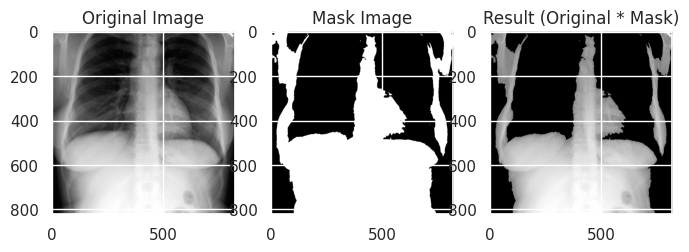

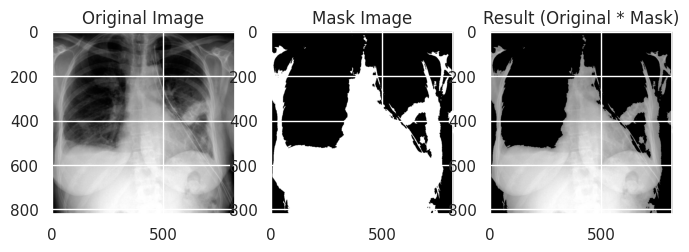

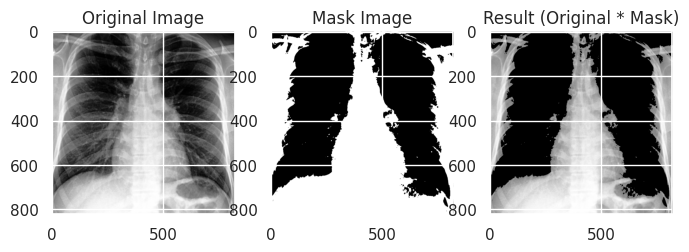

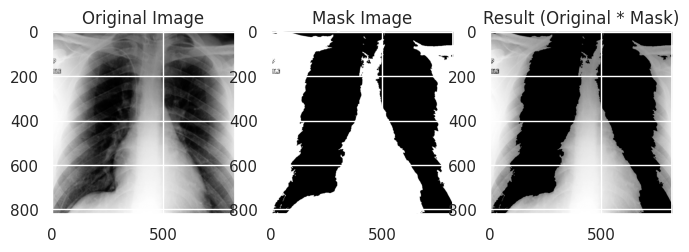

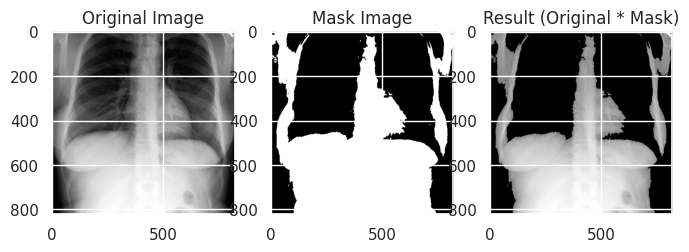

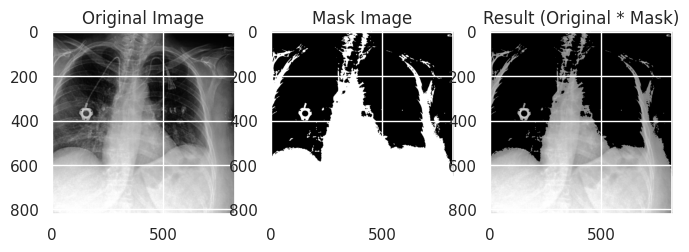

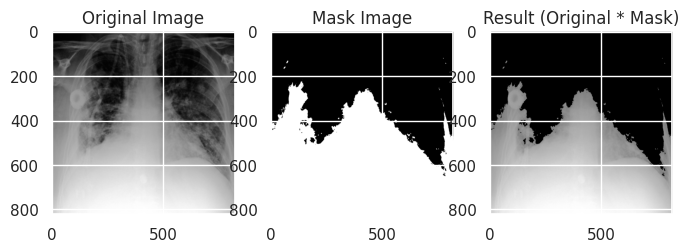

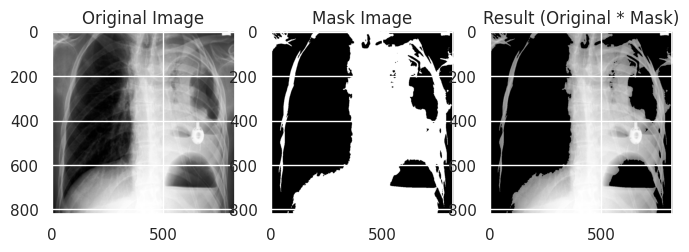

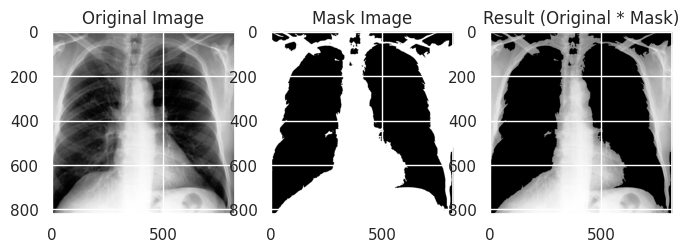

In [32]:
# İşlemler sonucunda elde ettiğiniz maske ile orijinal görüntüyü çarparak görüntü işleme sonuçlarını görselleştirip yorumlanıyor.
def visualize_results(original_image_path, mask_image_path):
    """Visualizes the results of image processing by multiplying the original image with the mask.

    Args:
        original_image_path: Path to the original image.
        mask_image_path: Path to the mask image.
    """
    original_img = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
    mask_img = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)

    if original_img is None or mask_img is None:
        print("Error: Could not read one or both images.")
        return

    # Ensure both images have the same dimensions
    if original_img.shape != mask_img.shape:
        print("Error: Images have different shapes")
        return

    # Normalize mask to be in the range 0-1
    mask_img = mask_img.astype(np.float32) / 255.0

    # Multiply the original image by the mask
    result_img = (original_img * mask_img).astype(np.uint8)

    # Display the images
    plt.figure(figsize=(8, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(mask_img, cmap='gray')
    plt.title('Mask Image')

    plt.subplot(1, 3, 3)
    plt.imshow(result_img, cmap='gray')
    plt.title('Result (Original * Mask)')

    plt.show()

# Example usage (replace with your actual paths)
image_directory = "gaussian_transformed_images"  # Röntgen resimlerinin bulunduğu dizin
mask_directory = "filtered_images"  # Maskelerin bulunduğu dizin

counter = 0
for filename in os.listdir(image_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')) and counter < 9:
        original_image_path = os.path.join(image_directory, filename)
        mask_image_path = os.path.join(mask_directory, filename)

        visualize_results(original_image_path, mask_image_path)
        counter += 1  # Sayacı artırıyoruz, böylece sadece 9 görüntü işlenir


Maskedeki beyaz alanlar (255), orijinal görüntüde belirli bir özellik veya alanın bulunduğunu, siyah alanlar (0) ise maskelenmiş ve ilgilenilmeyen alanları temsil eder. Buradan sonuçların gayet tatmin edici olduğu anlaşılıyor.